In [287]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [310]:
dopc = sp.zeros((4,5),dtype='object')

for i,t in enumerate([293,303,313,323]):
    for j in range(5):
        dopc[i,j] = sp.load('../dopc-'+str(t)+'/r'+str(j+1)+'/py_short.npz')

In [311]:
newarr = sp.zeros((4,5,3))
for k in range(5):
    for i in range(4):
        newarr[i,k,0] = dopc[i,k].f.arr_3[-1]
        newarr[i,k,1] = dopc[i,k].f.arr_4[-1]
    newarr[:,k,2] = [293,303,313,323]

(array([1.6e-10, 1.8e-10, 2.0e-10, 2.2e-10, 2.4e-10, 2.6e-10, 2.8e-10]),
 <a list of 7 Text yticklabel objects>)

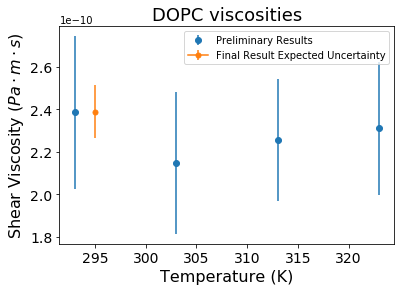

In [328]:
plt.errorbar(x = newarr[:,0,2], y = sp.average(newarr[:,:,0],axis=1,weights=newarr[:,:,1]**(-2)), 
             yerr = sp.sum(newarr[:,:,1]**2,axis=1)**(1/2), 
#              yerr = sp.stats.sem(newarr[:,:,0],axis=1),
             ls='', marker='.', ms=12, label='Preliminary Results')
# plt.plot(newarr[:,:,2], newarr[:,:,0],'s',ms=5)

# plt.ylim(1.7e-10,3e-10)
plt.errorbar(295,2.39e-10,yerr=1.25e-11, marker='.',ms=10, label='Final Result Expected Uncertainty')
# plt.suptitle('DOPC viscosities',size=18,y=1.05)
plt.title('DOPC viscosities',size=18)
# plt.title('Results from 12% simulation length',size=15)
plt.xlabel('Temperature (K)',size=16)
plt.ylabel('Shear Viscosity ($Pa\cdot m\cdot s$)',size=16)
plt.legend()
plt.xticks(size=14)
plt.yticks(size=14)

In [275]:
arr = sp.sum(newarr[:,:,1]**2,axis=1)**(1/2)

In [278]:
arr[0]/sp.sqrt(1/.12)

1.2469243643999615e-11